### Capture images using Selenium

In [155]:
from selenium import webdriver

CAMERA_TRUONGCHINH_AUCO_STREET = "http://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=56df807bc062921100c143da&camLocation=Tr%C6%B0%E1%BB%9Dng%20Chinh%20-%20%C3%82u%20C%C6%A1&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
def screen_shot():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options = options)

    driver.get(CAMERA_TRUONGCHINH_AUCO_STREET)
    driver.set_window_size(1920, 1080) 
    driver.save_screenshot("cam.png")

screen_shot()

KeyboardInterrupt: 

### Using captured images to count objects


0: 320x640 6 persons, 19 cars, 1 motorcycle, 1 bus, 1 train, 1 traffic light, 228.0ms
Speed: 8.9ms preprocess, 228.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)
number of person: 6
number of bicycle: 0
number of car: 19
number of motorcycle: 1
number of bus: 1
number of truck: 0
number of traffic light: 1
number of stop sign: 0


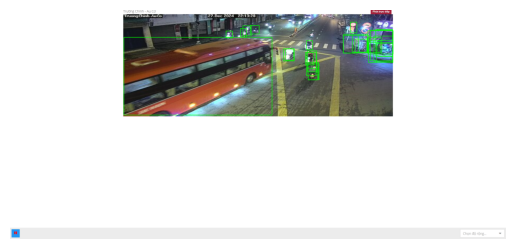

In [151]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

#use yolov8 model
model = YOLO("yolov8n.pt")

#count vehicle
def count_vehicle():
    #set of vehicle count
    vehicle_count = {'person': 0, 'bicycle': 0, 'car': 0, 'motorcycle': 0, 
                     'bus': 0, 'truck': 0, 'traffic light': 0, 'stop sign': 0}
    
    #mapping with each vehicle id
    mapping = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 
                5: 'bus', 7: 'truck', 9: 'traffic light', 11: 'stop sign'}
    #mapping = {2: 'car'}
    
    img = cv2.imread("cam.png")

    results = model(img, conf = 0.05)
    results = results[0]

    #names of each vehicle
    vehicle_names = results.names

    for box in results.boxes:
        class_id = int(box.cls)
        if class_id in mapping:
            vehicle_count[mapping[class_id]] += 1
            
            x1, y1, x2, y2 = map(int, box.xyxy[0]) 
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
        
    for vehicle, cnt in vehicle_count.items():
        print(f"number of {vehicle}: {cnt}")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for plt
    plt.axis('off')  # Tắt trục tọa độ
    plt.show()

count_vehicle()



0: 320x640 11 persons, 1 bicycle, 14 cars, 38 motorcycles, 1 airplane, 7 boats, 2 tvs, 175.0ms
Speed: 8.0ms preprocess, 175.0ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45

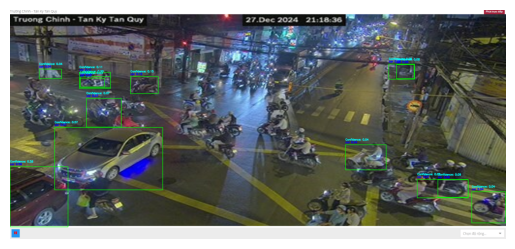

Số lượng phương tiện trong ảnh: 14


In [118]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Tải mô hình YOLOv8 đã huấn luyện sẵn
model = YOLO("yolov8n.pt")  # Hoặc "yolov8s.pt", "yolov8m.pt", "yolov8l.pt"

def count_vehicles_and_draw_grid(image_path):
    # Đọc ảnh
    img = cv2.imread(image_path)

    # Dự đoán đối tượng trong ảnh
    results = model(img, conf = 0.03)
    print(results)
    # Lọc các phương tiện (car, motorbike, bus, truck)
    vehicle_classes = [2]  # COCO class IDs cho car
    vehicle_count = 0

    # Kiểm tra các đối tượng được nhận diện
    for box in results[0].boxes:
        class_id = int(box.cls)  # ID lớp
        confidence = float(box.conf)  # Độ tin cậy của dự đoán
        
        # Kiểm tra nếu đó là phương tiện (car)
        if class_id in vehicle_classes:
            vehicle_count += 1

            # Vẽ bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # to get box coordinates (x1, y1, x2, y2)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

            label = f"{model.names[class_id]} {confidence:.2f}"
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Vẽ độ tin cậy trên ô vuông
            cv2.putText(img, f"Confidence: {confidence:.2f}", (x1, y1 - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

    # # Vẽ lưới vuông (grid)
    # height, width = img.shape[:2]
    # grid_size = 50  # Kích thước ô vuông của lưới

    # # Vẽ lưới theo chiều ngang
    # for x in range(0, width, grid_size):
    #     cv2.line(img, (x, 0), (x, height), (0, 0, 255), 1)  # Vẽ đường dọc
    # # Vẽ lưới theo chiều dọc
    # for y in range(0, height, grid_size):
    #     cv2.line(img, (0, y), (width, y), (0, 0, 255), 1)  # Vẽ đường ngang

    # Hiển thị ảnh với lưới và bounding boxes
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for plt
    plt.axis('off')  # Tắt trục tọa độ
    plt.show()

    return vehicle_count

# Ví dụ sử dụng
image_path = "cam.png"  # Đường dẫn tới ảnh
vehicle_count = count_vehicles_and_draw_grid(image_path)
print(f"Số lượng phương tiện trong ảnh: {vehicle_count}")


In [ ]:
def process_traffic_status():
    # Nhận hình ảnh từ request
    img = cv2.imread("cam.png")
    # Thực hiện inference
    results = model(img, conf=0.03)
    
    # Tạo từ điển để lưu số lượng các vật thể của mỗi loại
    object_counts = {}
    
    # Lặp qua các kết quả và đếm số lượng các vật thể của mỗi loại
    for result in results:
        # Lấy các hộp giới hạn và nhãn tương ứng từ kết quả
        boxes = result.boxes.cpu().numpy()  # Get boxes on CPU in numpy format
        labels = result.names
        
        # Duyệt qua từng hộp giới hạn và nhãn
        for box in boxes:  # Iterate over boxes
            class_id = int(box.cls[0])  # Get class ID
            class_name = labels[class_id]  # Get class name using the class ID
            
            # Tăng số lượng của loại vật thể trong từ điển
            if class_name in object_counts:
                object_counts[class_name] += 1
            else:
                object_counts[class_name] = 1
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # to get box coordinates (x1, y1, x2, y2)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

            # label = f"{model.names[class_id]} {confidence:.2f}"
            # cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # # Vẽ độ tin cậy trên ô vuông
            # cv2.putText(img, f"Confidence: {confidence:.2f}", (x1, y1 - 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for plt
    plt.axis('off')  # Tắt trục tọa độ
    plt.show()
process_traffic_status()


0: 320x640 11 persons, 1 bicycle, 14 cars, 38 motorcycles, 1 airplane, 7 boats, 2 tvs, 178.0ms
Speed: 4.0ms preprocess, 178.0ms inference, 3.9ms postprocess per image at shape (1, 3, 320, 640)


TypeError: unhashable type: 'list'